# MLB Analysis

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import seaborn as sns

## Data

In [2]:
df = pd.read_csv('data/2019_team_batting.csv')

In [3]:
df.head()

,Team_name,Team_url,Team_AB,Team_R,Team_H,Team_Doubles,Team_Triples,Team_HR,Team_RBI,Team_TB,Team_BB,Team_SO,Team_SB,Team_AVG,Team_OBP,Team_SLG,Team_OPS
0,Houston Astros,https://www.espn.com/mlb/team/_/name/hou/houst...,"5,613",920,"1,538",323,28,288,891,"2,781",645,"1,166",67,0.274,0.352,0.495,0.848
1,Minnesota Twins,https://www.espn.com/mlb/team/_/name/min/minne...,"5,732",939,"1,547",318,23,307,906,"2,832",525,"1,334",28,0.270,0.338,0.494,0.832
2,Boston Red Sox,https://www.espn.com/mlb/team/_/name/bos/bosto...,"5,770",901,"1,554",345,27,245,857,"2,688",590,"1,382",68,0.269,0.340,0.466,0.806
3,New York Yankees,https://www.espn.com/mlb/team/_/name/nyy/new-y...,"5,583",943,"1,493",290,17,306,904,"2,735",569,"1,437",55,0.267,0.339,0.490,0.829
4,Colorado Rockies,https://www.espn.com/mlb/team/_/name/col/color...,"5,660",835,"1,502",323,41,224,803,"2,579",489,"1,503",71,0.265,0.326,0.456,0.782


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team_name     30 non-null     object 
 1   Team_url      30 non-null     object 
 2   Team_AB       30 non-null     object 
 3   Team_R        30 non-null     int64  
 4   Team_H        30 non-null     object 
 5   Team_Doubles  30 non-null     int64  
 6   Team_Triples  30 non-null     int64  
 7   Team_HR       30 non-null     int64  
 8   Team_RBI      30 non-null     int64  
 9   Team_TB       30 non-null     object 
 10  Team_BB       30 non-null     int64  
 11  Team_SO       30 non-null     object 
 12  Team_SB       30 non-null     int64  
 13  Team_AVG      30 non-null     float64
 14  Team_OBP      30 non-null     float64
 15  Team_SLG      30 non-null     float64
 16  Team_OPS      30 non-null     float64
dtypes: float64(4), int64(7), object(6)
memory usage: 4.1+ KB


In [5]:
def convert_strings(column):
    df[column] = df[column].str.replace(',','').astype(int)

In [6]:
convert_strings('Team_AB')

In [7]:
convert_strings('Team_H')

In [8]:
convert_strings('Team_TB')

In [9]:
convert_strings('Team_SO')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team_name     30 non-null     object 
 1   Team_url      30 non-null     object 
 2   Team_AB       30 non-null     int64  
 3   Team_R        30 non-null     int64  
 4   Team_H        30 non-null     int64  
 5   Team_Doubles  30 non-null     int64  
 6   Team_Triples  30 non-null     int64  
 7   Team_HR       30 non-null     int64  
 8   Team_RBI      30 non-null     int64  
 9   Team_TB       30 non-null     int64  
 10  Team_BB       30 non-null     int64  
 11  Team_SO       30 non-null     int64  
 12  Team_SB       30 non-null     int64  
 13  Team_AVG      30 non-null     float64
 14  Team_OBP      30 non-null     float64
 15  Team_SLG      30 non-null     float64
 16  Team_OPS      30 non-null     float64
dtypes: float64(4), int64(11), object(2)
memory usage: 4.1+ KB


In [11]:
df.Team_name

0            Houston Astros
1           Minnesota Twins
2            Boston Red Sox
3          New York Yankees
4          Colorado Rockies
5      Washington Nationals
6        Pittsburgh Pirates
7         Chicago White Sox
8            Atlanta Braves
9       Los Angeles Dodgers
10            New York Mets
11           Tampa Bay Rays
12             Chicago Cubs
13     Arizona Diamondbacks
14        Cleveland Indians
15        Oakland Athletics
16            Texas Rangers
17       Los Angeles Angels
18       Kansas City Royals
19        Milwaukee Brewers
20        Baltimore Orioles
21    Philadelphia Phillies
22      St. Louis Cardinals
23          Cincinnati Reds
24            Miami Marlins
25           Detroit Tigers
26     San Francisco Giants
27         San Diego Padres
28         Seattle Mariners
29        Toronto Blue Jays
Name: Team_name, dtype: object

In [12]:
df_2 = df.drop(['Team_url', 'Team_AB'], axis=1)
df_2['Postseason'] = [1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 
                      0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
df_2.set_index('Team_name',inplace=True)
df_2.head()

,Team_R,Team_H,Team_Doubles,Team_Triples,Team_HR,Team_RBI,Team_TB,Team_BB,Team_SO,Team_SB,Team_AVG,Team_OBP,Team_SLG,Team_OPS,Postseason
Team_name,,,,,,,,,,,,,,,
Houston Astros,920,1538,323,28,288,891,2781,645,1166,67,0.274,0.352,0.495,0.848,1
Minnesota Twins,939,1547,318,23,307,906,2832,525,1334,28,0.270,0.338,0.494,0.832,1
Boston Red Sox,901,1554,345,27,245,857,2688,590,1382,68,0.269,0.340,0.466,0.806,0
New York Yankees,943,1493,290,17,306,904,2735,569,1437,55,0.267,0.339,0.490,0.829,1
Colorado Rockies,835,1502,323,41,224,803,2579,489,1503,71,0.265,0.326,0.456,0.782,0


In [13]:
grouped = pd.pivot_table(df_2, index='Postseason')
grouped

,Team_AVG,Team_BB,Team_Doubles,Team_H,Team_HR,Team_OBP,Team_OPS,Team_R,Team_RBI,Team_SB,Team_SLG,Team_SO,Team_TB,Team_Triples
Postseason,,,,,,,,,,,,,,
0,0.2490,501.8,280.75,1382.1,209.1,0.31695,0.7395,745.2,713.65,75.4,0.42255,1447.05,2344.95,27.4
1,0.2585,585.9,291.60,1439.7,259.4,0.33520,0.7944,856.3,819.80,77.2,0.45890,1388.20,2556.90,23.7


In [14]:
plt.style.use('fivethirtyeight')

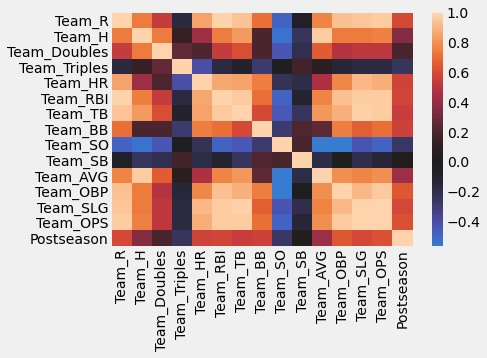

<ipython-input-39-245bdb218c13>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dfg = df_2.groupby(['Postseason'])['Team_AVG','Team_OBP','Team_SLG','Team_OPS'].mean()


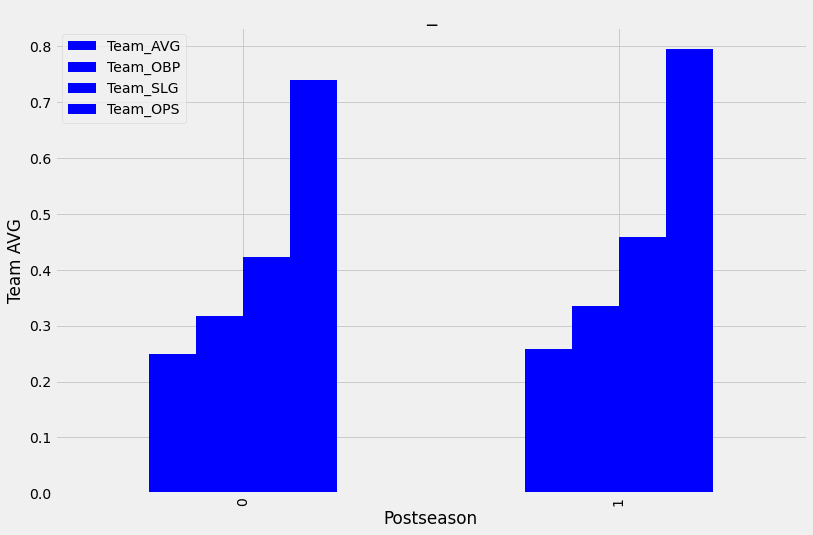

In [39]:
dfg = df_2.groupby(['Postseason'])['Team_AVG','Team_OBP','Team_SLG','Team_OPS'].mean()

dfg.plot(kind='bar', title='_', ylabel='Team AVG',
         xlabel='Postseason', figsize=(12, 8), color='b');

In [51]:
def plot_stats(column, title, ylabel, color):
    dfg = df_2.groupby(['Postseason'])[column].mean()

    dfg.plot(kind='bar', title=title, ylabel=ylabel,
         xlabel='Postseason', figsize=(8, 5), color=color);

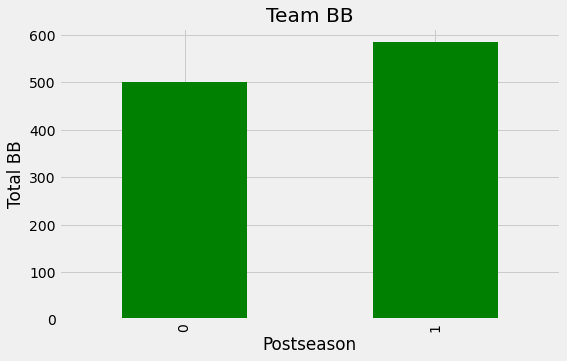

In [53]:
plot_stats('Team_BB', 'Team BB', 'Total BB', 'g')

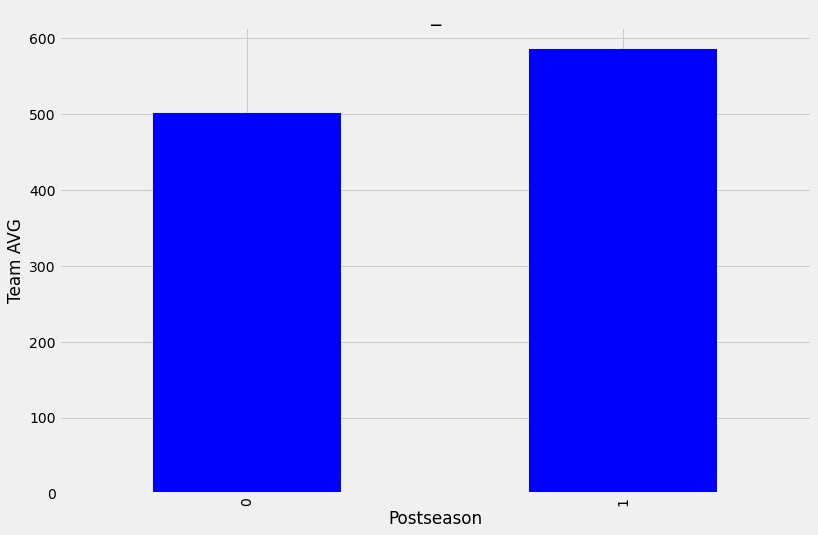

In [54]:
plot_stats()

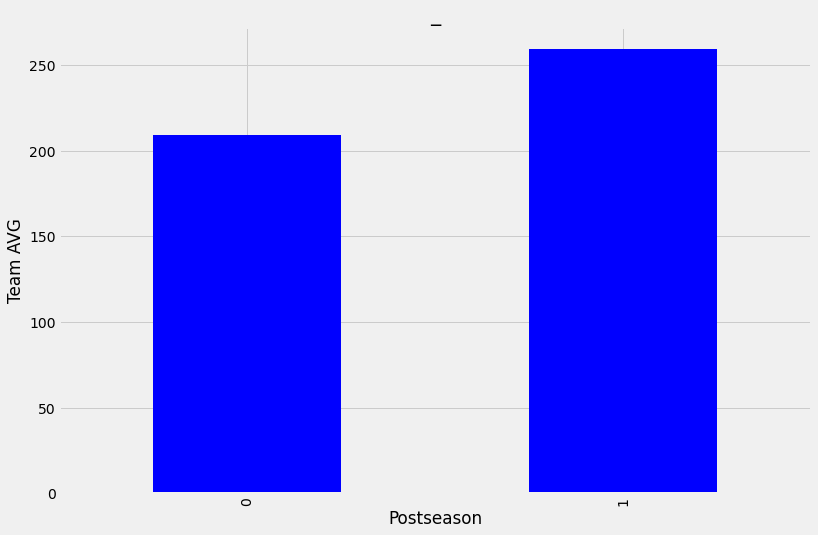

In [38]:
dfg = df_2.groupby(['Postseason'])['Team_HR'].mean()

dfg.plot(kind='bar', title='_', ylabel='Team AVG',
         xlabel='Postseason', figsize=(12, 8), color='b');

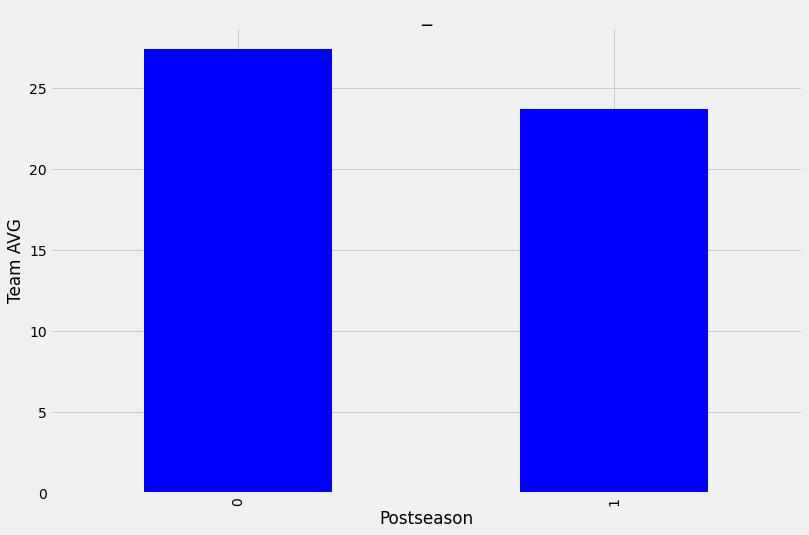

In [40]:
dfg = df_2.groupby(['Postseason'])['Team_Triples'].mean()

dfg.plot(kind='bar', title='_', ylabel='Team AVG',
         xlabel='Postseason', figsize=(12, 8), color='b');

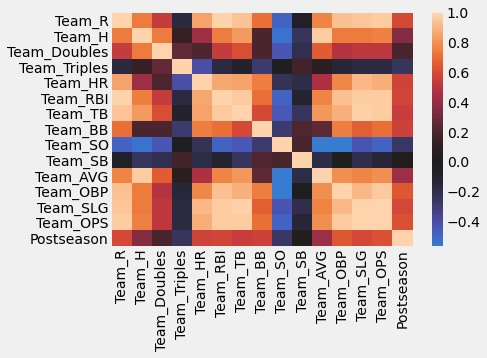

In [41]:
#Create heatmap to check for highly correlated features.
sns.heatmap(df_2.corr(), center=0);

In [17]:
def plot_dist(column):
    sns.displot(x=df_2[column],kind='hist',kde=True);

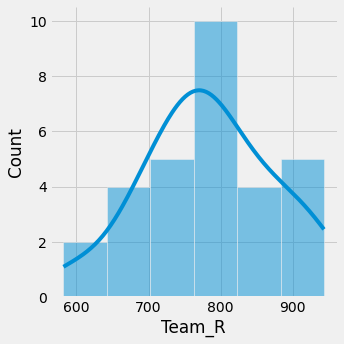

In [18]:
plot_dist('Team_R')

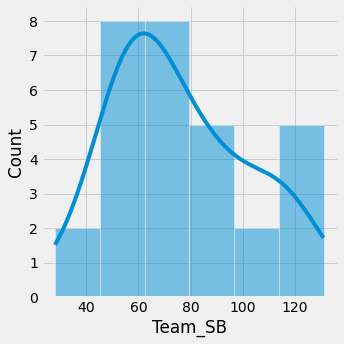

In [19]:
plot_dist('Team_SB')

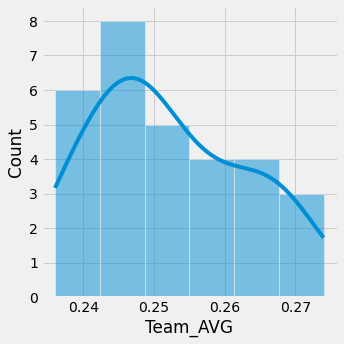

In [20]:
plot_dist('Team_AVG')